In [36]:
import os 
import pandas as pd 
import numpy as np
import matplotlib # 색상차트 
import matplotlib.pyplot as plt
import platform
import squarify # 트리맵

In [21]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 

DATA_IN_PATH = './data/general/'
fileList = os.listdir(DATA_IN_PATH)
print(fileList)

['1. 사회복지 분야 소관별 추이.CSV', '2. 사회복지 분야 기금별 추이.CSV', '3. 사회복지 분야 부문별 추이.CSV', '4. 사회복지 분야 성질별 추이.CSV', '5. 사회복지 분야 주요 세부사업 현황.CSV', '6. 사회복지 분야 재정구조.CSV', '7. 사회복지 분야 의무·재량지출 추이.CSV', '8. 사회복지 분야 회계·기금별 추이.CSV', '9. 사회복지 분야 국고보조금 추이.CSV', '사회복지 분야 특별회계별 추이.CSV']


In [22]:
def drawLastRow(fileName):
    global plotCount
    tempData = pd.read_csv(DATA_IN_PATH + fileName, encoding='CP949')
    tempData.drop(['연도','기준'],inplace=True, axis=1)

    plotCount = plotCount + 1
    lastRow = tempData.tail(1)
    plt.figure(figsize=(15, 9))
    plt.figure(plotCount)
    plt.bar(tempData.columns, lastRow.iloc[0])
    plt.title(fileName)
#     print(tempData)


[None, None, None, None, None, None, None, None, None, None]

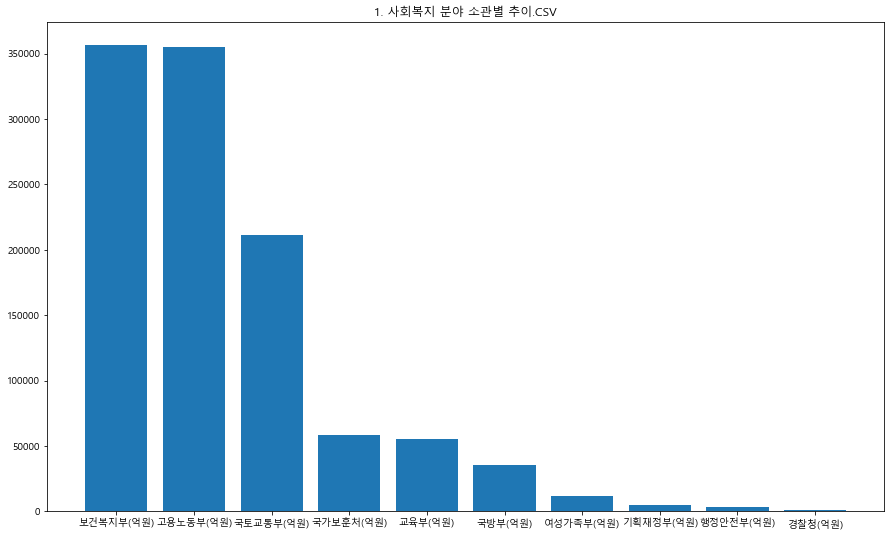

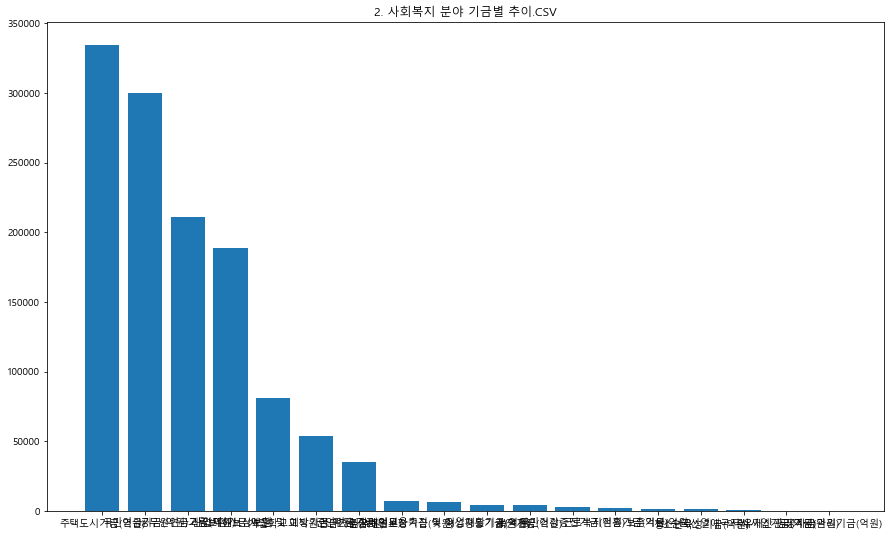

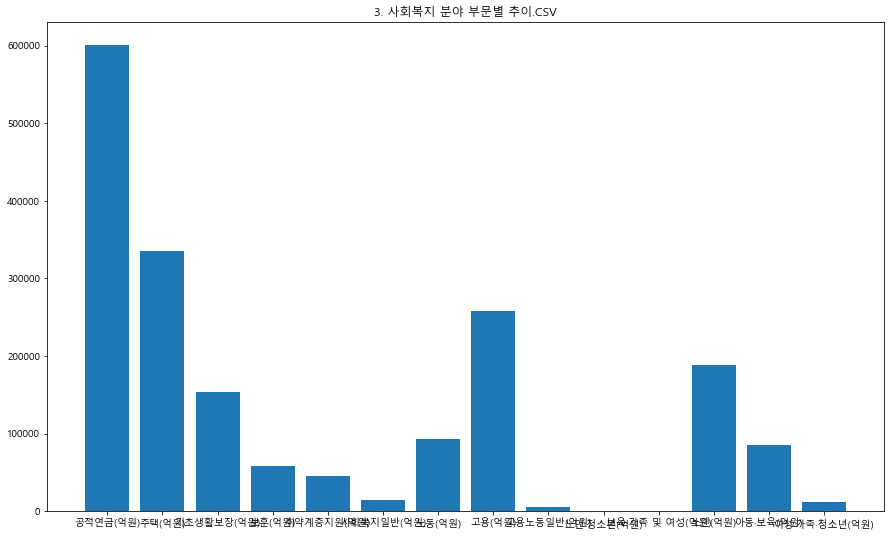

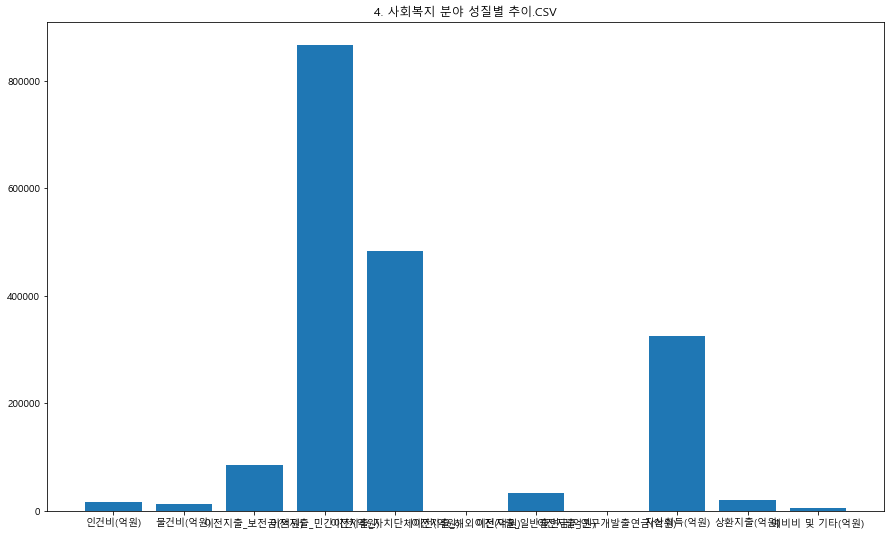

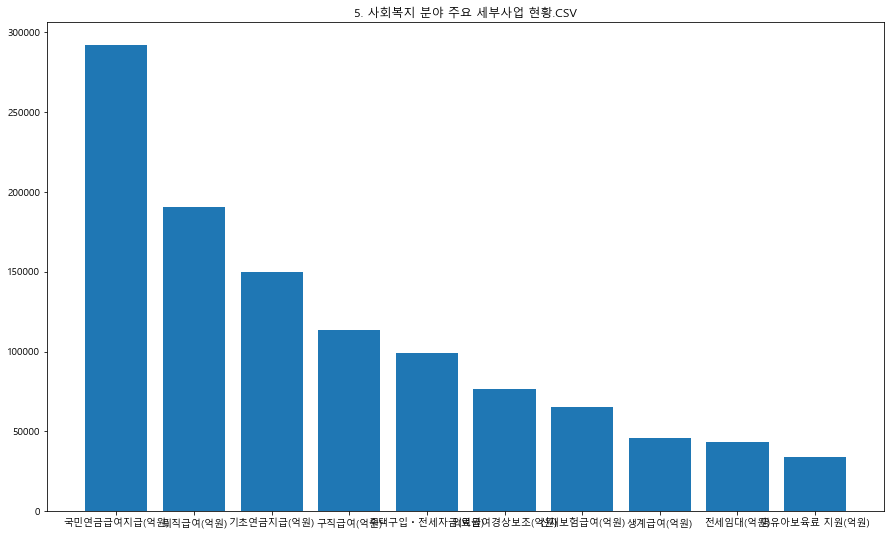

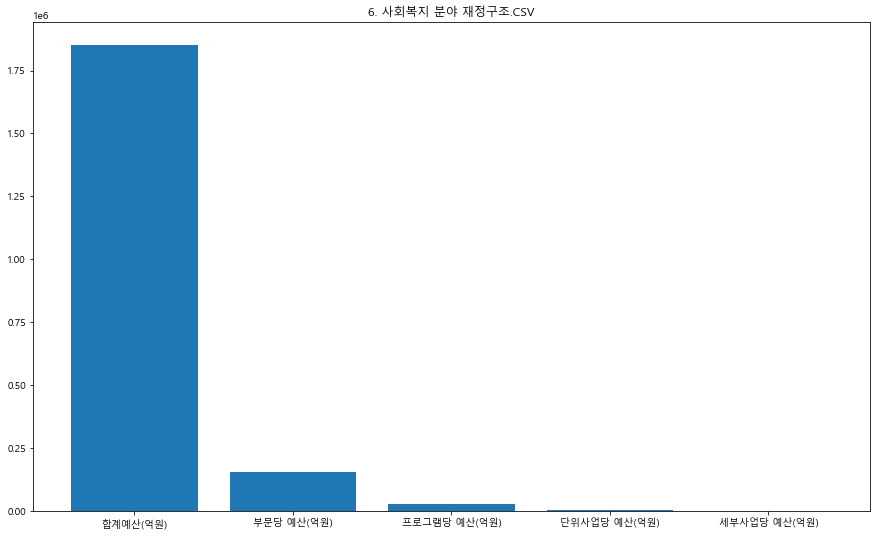

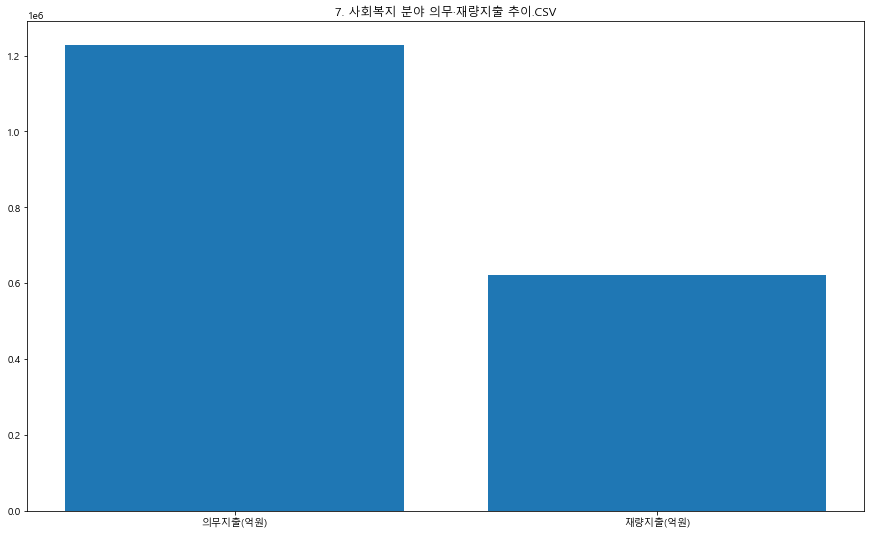

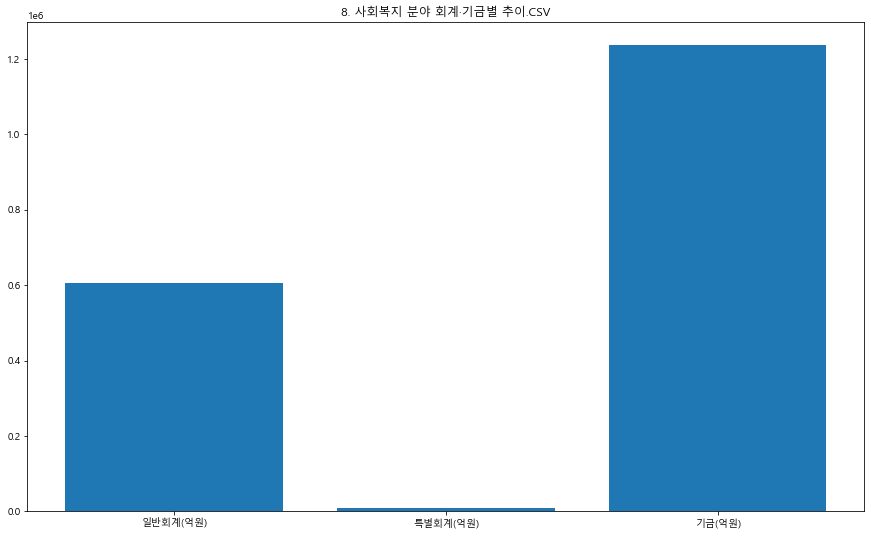

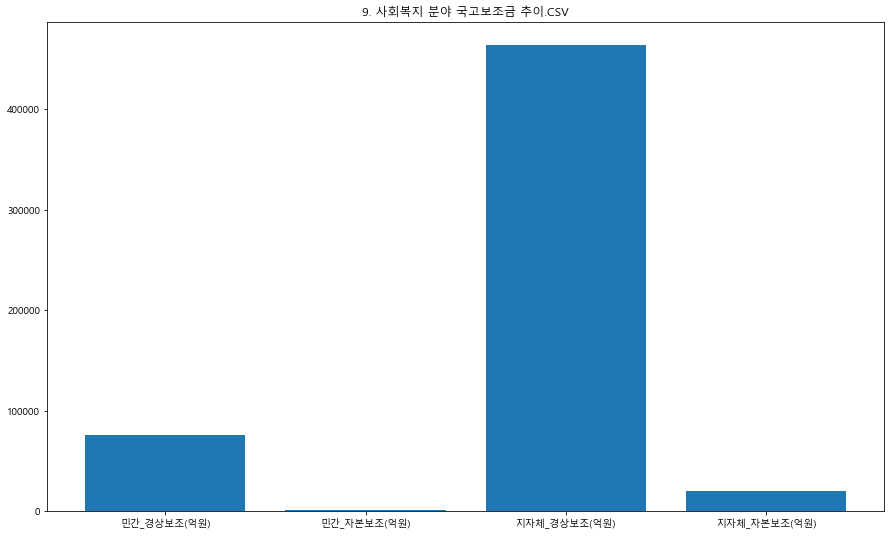

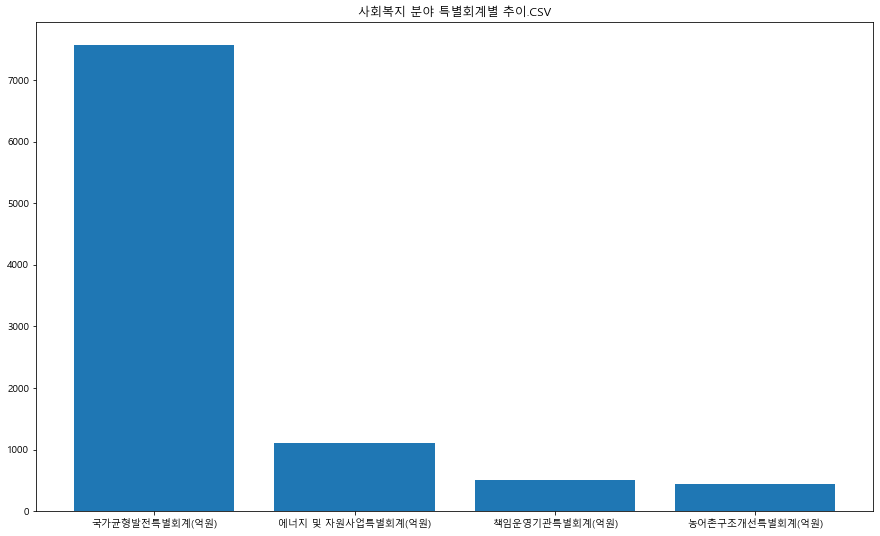

In [23]:
plotCount = 0
[drawLastRow(fileName) for fileName in fileList]


<AxesSubplot:>

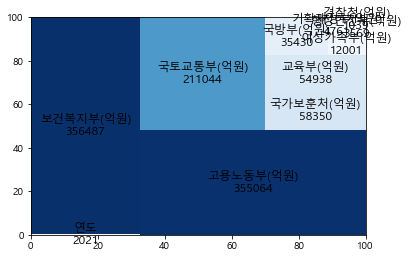

In [41]:
# 트리맵
df1 = pd.read_csv(DATA_IN_PATH+'1. 사회복지 분야 소관별 추이.CSV', 
                 encoding='CP949')
df1.drop(['기준'], inplace=True, axis=1)
dfT1=df1.transpose() # 행렬 바꾸기

cmap = matplotlib.cm.Blues    # 값이 클 수록 진한 파랑색을 가지는 컬러맵
minimum=dfT1[2].min()
maximum=dfT1[2].max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)   # 최소값, 최대값으로 정규화 하기
color_list = [cmap(norm(value)) for value in dfT1[2]]       # 컬러 표현값으로 변경하기
color_list

squarify.plot(sizes=dfT1[2], label = dfT1.index, value = dfT1[2], color = color_list, text_kwargs={'color':'black', 'size':12})